In [2]:
import error_lib as err
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import tensorflow as tf
from matplotlib.ticker import AutoMinorLocator

%load_ext autoreload
%autoreload 2

In [3]:
def format_grid_string(c9, c10):
    return f'data/wilson_grid/toy_data_c9_{c9}_c10_{c10}_2022_2_2_11_grid.csv'

## Load models

In [4]:
model_3d_cnn = tf.keras.models.load_model('data/models/model_3d_10bins_10000n')
model_3d_dense = tf.keras.models.load_model('data/models/model_3d_dense_10bins_5000n')
model_3d_pure = tf.keras.models.load_model('data/models/model_3d_10bins_10000n_pure')
model_3d_no_weight = tf.keras.models.load_model('data/models/model_3d_10bins_10000n_no_weighting')
# model_3d_dense_interp = tf.keras.models.load_model('data/models/model_3d_dense_10bins_interp')

# 2D Prediction Distribution

In [45]:
predictions = {}
for c9 in np.arange(-3,4):
    for c10 in np.arange(-3,4):
        sample_sm = pd.read_csv(format_grid_string(c9, c10))

        predictions_dense = err.compute_error_binned(
            model_3d_no_weight, 
            sample_sm[['q2', 'k', 'l']], 
            10, 
            10, 
            10000,
            # weights=sample_sm['scenario_8_w']
        )

        c9_predictions_dense, c10_predictions_dense = predictions_dense[:,0], predictions_dense[:,1]

        predictions[(c9,c10)] = (c9_predictions_dense, c10_predictions_dense)

NameError: name 'AutoMinorLocator' is not defined

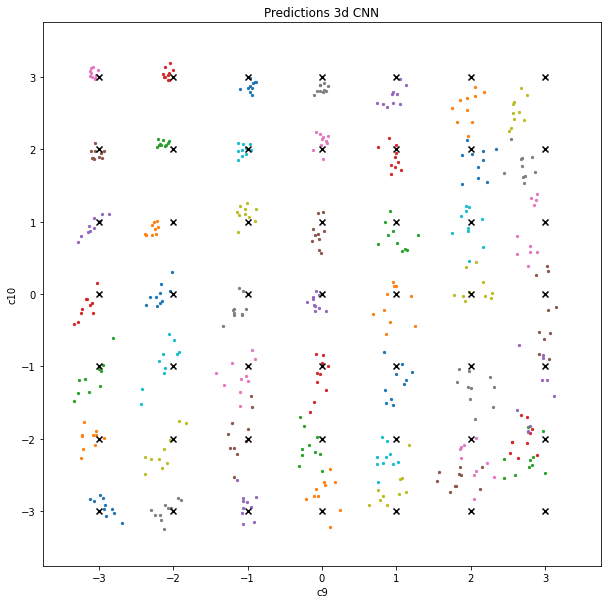

In [47]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
for key, value in predictions.items():
    c9, c10 = key
    pred_x, pred_y = value
    plt.scatter(pred_x, pred_y, s=5, cmap='Pastel1')
    plt.scatter(c9,c10,marker='x', color='black')
plt.title('Predictions 3d CNN')
plt.xlabel('c9')
plt.ylabel('c10')
plt.xlim(-3.75,3.75)
plt.ylim(-3.75,3.75)     

ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.xaxis.set_minor_locator(AutoMinorLocator())

plt.tick_params(direction='in')
plt.tick_params(which='minor', direction='in')

plt.show()

# Prediction spread with sample size

In [48]:
c9_const, c10_const = -3, 0
sample_sizes = np.arange(1000,21000,1000)

predictions = {}
original_data = pd.read_csv(format_grid_string(c9_const, c10_const))
for sample_size in sample_sizes:

    predictions[sample_size] = err.compute_error_binned(
        model_3d_no_weight, 
        original_data[['q2', 'k', 'l']], 
        100, 
        10, 
        sample_size,
    )

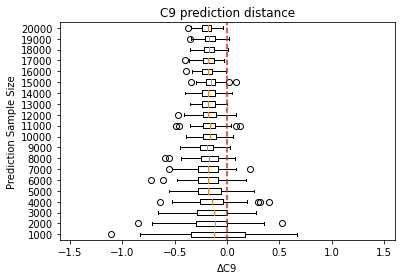

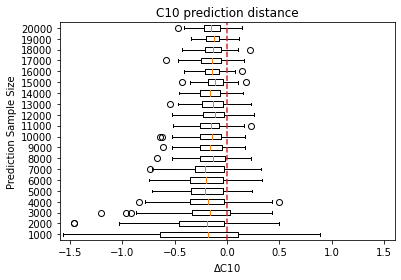

In [50]:
diffs = []
diffs_x = []
diffs_y = []
for sample_size, prediction in predictions.items():
    diff_x , diff_y = prediction[:,0] - c9_const, prediction[:,1] - c10_const
    total_diff = np.append(diff_x, diff_y)
    diffs.append(total_diff)
    diffs_x.append(diff_x)
    diffs_y.append(diff_y)
    
    # plt.scatter(pred_x + sample_size, pred_y )
    # plt.scatter(c9_const +  sample_size, c10_const, marker='X', c='black')
# plt.boxplot(diffs, vert=False)
plt.boxplot(diffs_x, vert=False)
plt.title('C9 prediction distance')
plt.ylabel('Prediction Sample Size')
plt.xlabel('$\Delta$C9')
plt.yticks(np.arange(1, len(diffs_x) + 1), sample_sizes)

plt.axvline(0, c='tab:red', linestyle='--')
plt.xlim(-1.6,1.6)
plt.show()

plt.boxplot(diffs_y, vert=False)
plt.title('C10 prediction distance')
plt.ylabel('Prediction Sample Size')
plt.xlabel('$\Delta$C10')
plt.yticks(np.arange(1, len(diffs_y) + 1), sample_sizes)

plt.axvline(0, c='tab:red', linestyle='--')
plt.xlim(-1.6,1.6)
plt.show()

# Quantify Errors

In [104]:
x_std, y_std = [], []
c9x = np.arange(-3,4)

for i in c9x:
    x_data, y_data = predictions[(i,0)]
    x_std.append(x_data.std())
    y_std.append(y_data.std())

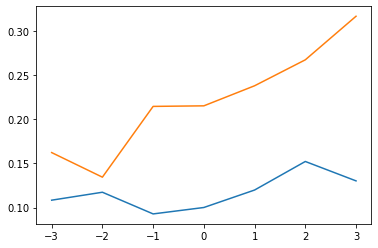

In [106]:
plt.plot(c9x, x_std)
plt.plot(c9x, y_std)

# Testing live update

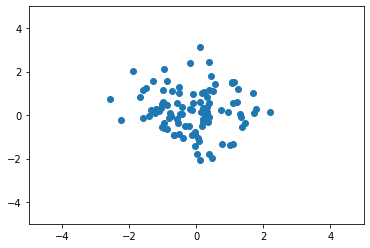

In [77]:
import matplotlib.pyplot as plt
import numpy as np

plt.ion()

fig, ax = plt.subplots()

plot = ax.scatter([], [])
ax.set_xlim(-5, 5)
ax.set_ylim(-5, 5)

for _ in range(100):
    # get two gaussian random numbers, mean=0, std=1, 2 numbers
    point = np.random.normal(0, 1, 2)
    # get the current points as numpy array with shape  (N, 2)
    array = plot.get_offsets()


    # add the points to the plot
    array = np.vstack([array, point])
    plot.set_offsets(array)

    # update x and ylim to show all points:
    # ax.set_xlim(array[:, 0].min() - 0.5, array[:,0].max() + 0.5)
    # ax.set_ylim(array[:, 1].min() - 0.5, array[:, 1].max() + 0.5)
    # update the figure
    fig.canvas.draw()

In [65]:
a = np.array([1,2])
b = np.array([10,20])

In [72]:
np.vstack([a, b])

array([[ 1,  2],
       [10, 20]])